In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import DataLoader

In [2]:
dataset = pd.read_csv("./fashion-mnist.csv")
print(len(dataset))

60000


In [3]:
targets_cls = dataset.pop("label")

inputs = np.array(dataset)
targets_cls = np.array(targets_cls)


targets = []

In [4]:
for _ in targets_cls:
    x = np.zeros(10)
    x[_] = 1
    targets.append(x) 

targets = np.array(targets)
inputs = inputs/255

print(inputs.shape, targets.shape)

(60000, 784) (60000, 10)


In [5]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size= 0.2, random_state=123)

print(inputs_train.shape, targets_train.shape, inputs_test.shape, targets_test.shape)

(48000, 784) (48000, 10) (12000, 784) (12000, 10)


In [6]:
inputs_train = torch.from_numpy(inputs_train.astype(np.float32)) 
inputs_test = torch.from_numpy(inputs_test.astype(np.float32)) 
targets_train = torch.from_numpy(targets_train.astype(np.float32)) 
targets_test = torch.from_numpy(targets_test.astype(np.float32)) 

In [7]:
input_train_dl = DataLoader(inputs_train,10)

In [8]:
class FashionModel(torch.nn.Module):
    def __init__(self,inputs_dim, layer_dim , output_dim):
        super().__init__()
        self.linear1 = torch.nn.Linear(inputs_dim, layer_dim)
        self.linear2 = torch.nn.Linear(layer_dim, output_dim)
    
    def forward(self,inputs):
        self.output1 = torch.relu(self.linear1(inputs))
        targets_pred = torch.softmax(self.linear2(self.output1),dim=-1)
        
        return(targets_pred)

class FashionModel2(torch.nn.Module):
    def __init__(self,inputs_dim, output_dim):
        super().__init__()
        self.linear = torch.nn.Linear(inputs_dim, output_dim)
    
    def forward(self,inputs):
        targets_pred = torch.softmax(self.linear(inputs),dim=-1)
        
        return(targets_pred)

FashionNetwork = FashionModel(784, 64, 10)
# FashionNetwork = FashionModel2(784,10)

In [9]:
loss_fn = torch.nn.BCELoss()

In [10]:
opt = torch.optim.SGD(FashionNetwork.parameters(), lr = 1)

In [11]:
epochs = 300

for epoch in range(epochs):
    targets_pred = FashionNetwork(inputs_train)
    loss = loss_fn(targets_pred, targets_train)
    
    loss.backward()
    
    opt.step()
    opt.zero_grad()
    
    if (epoch+1)%10 == 0:
       print("Epoch: ", epoch+1, "  Loss: ", round(loss.item(),4))
    
    if (epoch+1)%50 == 0:
        with torch.no_grad():
        
            targets_test_pred = FashionNetwork(inputs_test)
            targets_test_cls = targets_test_pred.detach().clone()

            for i in range(len(targets_test_cls)):
                for j in range(len(targets_test_cls[i])):
                    if targets_test_cls[i][j] == max(targets_test_cls[i]):
                        targets_test_cls[i][j] = 1
                    else:
                        targets_test_cls[i][j] = 0
            
            targets_test_temp = targets_test.detach().clone()

            
            correct = 0
            
            for i in range(len(targets_test_temp)):
                if targets_test_temp[i].eq(targets_test_cls[i]).sum()==10:
                    correct += 1
            
            acc = correct/len(targets_test)
            accuracy = round(acc*100)
            
            print("Accuracy : ",accuracy,"%")
            
            if accuracy>90:
                break 

Epoch:  1   Loss:  0.3276
Epoch:  2   Loss:  0.3218
Epoch:  3   Loss:  0.3178
Epoch:  4   Loss:  0.3137
Epoch:  5   Loss:  0.3096
Epoch:  6   Loss:  0.3055
Epoch:  7   Loss:  0.301
Epoch:  8   Loss:  0.2962
Epoch:  9   Loss:  0.2912
Epoch:  10   Loss:  0.2858
Epoch:  11   Loss:  0.28
Epoch:  12   Loss:  0.274
Epoch:  13   Loss:  0.2677
Epoch:  14   Loss:  0.2613
Epoch:  15   Loss:  0.2546
Epoch:  16   Loss:  0.248
Epoch:  17   Loss:  0.2414
Epoch:  18   Loss:  0.2349
Epoch:  19   Loss:  0.2286
Epoch:  20   Loss:  0.2226
Epoch:  21   Loss:  0.2168
Epoch:  22   Loss:  0.2114
Epoch:  23   Loss:  0.2062
Epoch:  24   Loss:  0.2013
Epoch:  25   Loss:  0.1968
Epoch:  26   Loss:  0.1925
Epoch:  27   Loss:  0.1885
Epoch:  28   Loss:  0.1847
Epoch:  29   Loss:  0.1812
Epoch:  30   Loss:  0.178
Epoch:  31   Loss:  0.1749
Epoch:  32   Loss:  0.172
Epoch:  33   Loss:  0.1694
Epoch:  34   Loss:  0.1669
Epoch:  35   Loss:  0.1645
Epoch:  36   Loss:  0.1623
Epoch:  37   Loss:  0.1603
Epoch:  38   Loss

Prediction:  9
Target:  9

0 T-shirt/top, 1 Trouser, 
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot



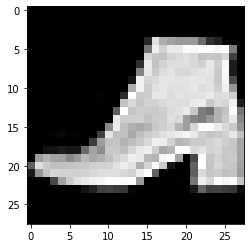

In [59]:
import matplotlib.pyplot as plt

index = 1111

test = inputs[index]

img_arr = test.reshape(28,28)
plt.imshow(img_arr, cmap="gray")

test = torch.from_numpy(test.reshape(1,-1).astype(np.float32))

pred = FashionNetwork(test).detach().numpy()
pred_cls = np.where(pred==pred.max())
print("Prediction: ",pred_cls[1][0])
print("Target: ",targets_cls[index])

print("""
0 T-shirt/top, 1 Trouser, 
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot
""")